# Bonjour les amis
(hello friends in french)
 
Today we will Predict Stock price using RNN-LSTM 

DO UPVOTE IF YOU LIKE THE NOTEBOOK.
THANK YOU

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gooogle-stock-price/Google_Stock_Price_Train.csv
/kaggle/input/gooogle-stock-price/Google_Stock_Price_Test.csv


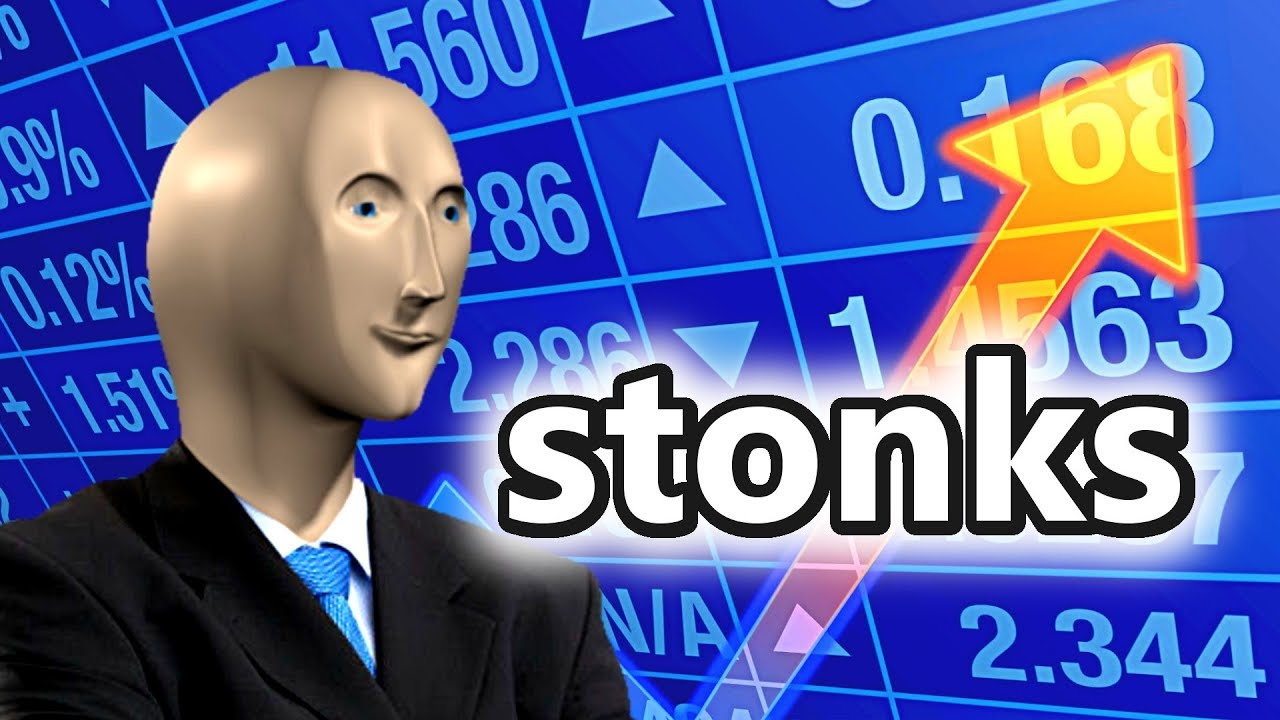

DISCLAIMER : the future stocks prices are always independent of their past

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.preprocessing import MinMaxScaler

import tensorflow
from keras.layers import LSTM, Dense, Activation, Dropout, Flatten
from keras.models import Sequential
from keras.optimizers import Adam

1. Importing the dataset

In [3]:
test = pd.read_csv('../input/gooogle-stock-price/Google_Stock_Price_Test.csv')

train = pd.read_csv('../input/gooogle-stock-price/Google_Stock_Price_Train.csv')

In [4]:
train.head(120)

Date    Open    High     Low   Close      Volume
0     1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1     1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2     1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3     1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4     1/9/2012  322.04  322.29  309.46  620.76  11,688,800
..         ...     ...     ...     ...     ...         ...
115  6/18/2012  280.26  286.03  278.58  569.29   5,012,400
116  6/19/2012  285.72  291.05  285.49  579.94   4,167,900
117  6/20/2012  288.82  288.92  285.68  575.93   4,710,800
118  6/21/2012  288.84  288.84  280.81  563.66   4,037,600
119  6/22/2012  282.94  284.67  281.85  569.92   4,472,400

[120 rows x 6 columns]

In [5]:
train_Set = train.iloc[:,1:2].values

train_Set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [6]:
minmaxsc = MinMaxScaler()

train_Set = minmaxsc.fit_transform(train_Set)

In [7]:
len(train_Set)

1258

In [8]:
x_train = []
y_train = []

for i in range(120,len(train_Set)):
    x_train.append(train_Set[i-120:i,0])
    y_train.append(train_Set[i,0])
    
x_train = np.array(x_train)
y_train = np.array(y_train)

In [9]:
x_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.0180445 , 0.0180817 ,
        0.00710618],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.0180817 , 0.00710618,
        0.0064923 ],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.00710618, 0.0064923 ,
        0.00225091],
       ...,
       [0.78201503, 0.79792023, 0.81851328, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.79792023, 0.81851328, 0.82688444, ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.81851328, 0.82688444, 0.82308952, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [10]:
y_train

array([0.0064923 , 0.00225091, 0.00682714, ..., 0.95725128, 0.93796041,
       0.93688146])

In [11]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [12]:
model = Sequential()

model.add(LSTM(units = 100,return_sequences = True,input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.25))

model.add(LSTM(units = 100,return_sequences = True))
model.add(Dropout(0.25))

model.add(LSTM(units = 100,return_sequences = True))
model.add(Dropout(0.25))

model.add(LSTM(units = 100,return_sequences = True))
model.add(Dropout(0.25))

model.add(LSTM(units = 100))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1))

In [13]:
opt = Adam(lr=0.001)
model.compile(loss = 'mean_squared_error',optimizer = opt)

In [14]:
history = model.fit(x_train,y_train,epochs = 100,batch_size = 32)

Epoch 1/100
36/36 [==============================] - 22s 606ms/step - loss: 0.0364
Epoch 2/100
36/36 [==============================] - 20s 569ms/step - loss: 0.0059
Epoch 3/100
36/36 [==============================] - 21s 573ms/step - loss: 0.0050
Epoch 4/100
36/36 [==============================] - 20s 568ms/step - loss: 0.0048
Epoch 5/100
36/36 [==============================] - 21s 577ms/step - loss: 0.0048
Epoch 6/100
36/36 [==============================] - 21s 595ms/step - loss: 0.0056
Epoch 7/100
36/36 [==============================] - 20s 566ms/step - loss: 0.0043
Epoch 8/100
36/36 [==============================] - 20s 569ms/step - loss: 0.0041
Epoch 9/100
36/36 [==============================] - 21s 581ms/step - loss: 0.0040
Epoch 10/100
36/36 [==============================] - 20s 568ms/step - loss: 0.0043
Epoch 11/100
36/36 [==============================] - 21s 573ms/step - loss: 0.0045
Epoch 12/100
36/36 [==============================] - 21s 587ms/step - loss: 0.0040
E

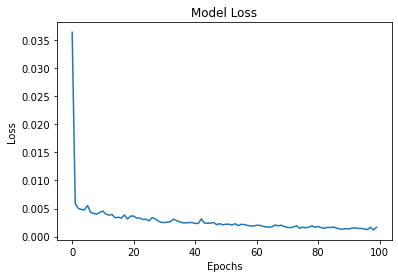

In [15]:
plt.plot(history.history['loss']) 
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [16]:
real_stock_price = test.iloc[:,1:2].values

In [17]:
dataset = pd.concat((train['Open'],test['Open']), axis = 0)
inputs = dataset[len(dataset) - len(test) - 120:].values
inputs = inputs.reshape(-1,1)
inputs = minmaxsc.transform(inputs)

x_test = []
for i in range(120,140):
    x_test.append(inputs[i-120:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

predict = model.predict(x_test)
predict = minmaxsc.inverse_transform(predict)

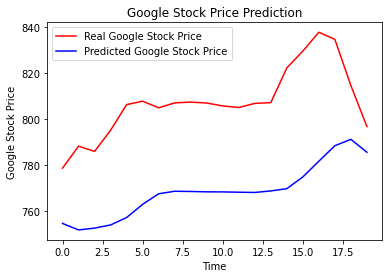

In [18]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predict, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()